<a href="https://colab.research.google.com/github/anu82sharma12/risk_entropy_analyzer/blob/main/risk_entropy_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Portfolio Return: 0.07%
Portfolio Volatility: 0.49%
Information Entropy (Diversification Index): 3.034 bits


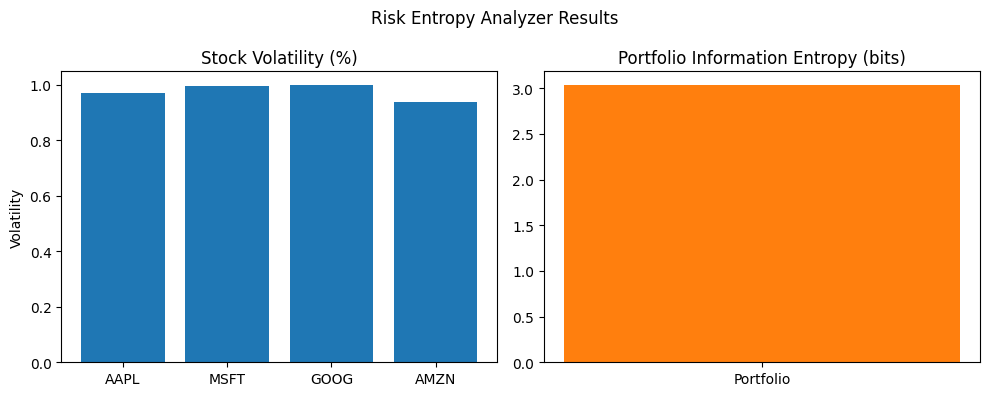

In [6]:
# risk_entropy_analyzer_fixed.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- STEP 1: Create mock price data (avoids Yahoo issues) ---
np.random.seed(42)
days = 252
tickers = ["AAPL", "MSFT", "GOOG", "AMZN"]
# Simulate price paths with random noise
data = pd.DataFrame(
    {
        t: 100 * np.cumprod(1 + np.random.normal(0.0005, 0.01, days))
        for t in tickers
    }
)

# --- STEP 2: Compute daily returns ---
returns = data.pct_change().dropna()

# --- STEP 3: Compute volatility and mean returns ---
mean_returns = returns.mean()
volatility = returns.std()

# Equal weights portfolio
weights = np.ones(len(tickers)) / len(tickers)
portfolio_return = np.dot(mean_returns, weights)
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))

print(f"Portfolio Return: {portfolio_return*100:.2f}%")
print(f"Portfolio Volatility: {portfolio_volatility*100:.2f}%")

# --- STEP 4: Compute Information Entropy ---
corr_matrix = returns.corr().values.flatten()
corr_matrix = np.abs(corr_matrix[corr_matrix != 1.0])  # remove self-correlations
probs = corr_matrix / corr_matrix.sum()
entropy = -np.sum(probs * np.log2(probs))
print(f"Information Entropy (Diversification Index): {entropy:.3f} bits")

# --- STEP 5: Plot Results ---
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart of volatility
ax[0].bar(tickers, volatility * 100, color="#1f77b4")
ax[0].set_title("Stock Volatility (%)")
ax[0].set_ylabel("Volatility")

# Entropy visualization
ax[1].bar(["Portfolio"], [entropy], color="#ff7f0e")
ax[1].set_title("Portfolio Information Entropy (bits)")

plt.suptitle("Risk Entropy Analyzer Results")
plt.tight_layout()
plt.show()
